# Lab. de IA - Redes Neurais
<i> Alexandre Augusto,  Julio Cesar Rocha e Marco Tulio </i>

# Pre-processamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True

In [13]:
# Abrindo o arquivo de dados e iniciando o dataframe
header = ["Area A", "Perimetro P", "compacidade C", "Comprimento Nucleo", "Largura Nucleo", "Coeficiente Assimetria", "Comprimento Nucleo", "Saída"]
file = "./seeds_dataset.txt"
data_frame = pd.read_csv(file, sep = '	', header = None)
data_frame.columns = header
print(data_frame)

     Area A  Perimetro P  compacidade C  Comprimento Nucleo  Largura Nucleo  \
0     15.26        14.84         0.8710               5.763           3.312   
1     14.88        14.57         0.8811               5.554           3.333   
2     14.29        14.09         0.9050               5.291           3.337   
3     13.84        13.94         0.8955               5.324           3.379   
4     16.14        14.99         0.9034               5.658           3.562   
..      ...          ...            ...                 ...             ...   
205   12.19        13.20         0.8783               5.137           2.981   
206   11.23        12.88         0.8511               5.140           2.795   
207   13.20        13.66         0.8883               5.236           3.232   
208   11.84        13.21         0.8521               5.175           2.836   
209   12.30        13.34         0.8684               5.243           2.974   

     Coeficiente Assimetria  Comprimento Nucleo  Sa

In [16]:
# Criando uma coluna de saída binária para cada tipo de saída
data_frame['KAMA'] = np.where(data_frame['Saída'] == 1, 1, 0)
data_frame['ROSA'] = np.where(data_frame['Saída'] == 2, 1, 0)
data_frame['CANADENSE'] = np.where(data_frame['Saída'] == 3, 1, 0)

In [17]:
# Imprimindo data frame atual
data_frame

,Area A,Perimetro P,compacidade C,Comprimento Nucleo,Largura Nucleo,Coeficiente Assimetria,Comprimento Nucleo,Saída,KAMA,ROSA,CANADENSE
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,0,0,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,0,0,1
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,0,0,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,0,0,1


In [18]:
# Separando dados para aprendizagem (70%) e dados para teste (30%)
To_learn = 0.7
To_test = 0.3

KAMA_Outputs = (data_frame['Saída'] == 1).value_counts()
ROSA_Outputs = (data_frame['Saída'] == 2).value_counts()
CANADENSE_Outputs = (data_frame['Saída'] == 3).value_counts()

KAMA_Learn = data_frame[data_frame['Saída'] == 1]
KAMA_Learn = KAMA_Learn[0:int(KAMA_Outputs[1] * To_learn)]
KAMA_Test = data_frame[data_frame['Saída'] == 1]
KAMA_Test = KAMA_Test[int(KAMA_Outputs[1] * To_learn):KAMA_Outputs[1]]

ROSA_Learn = data_frame[data_frame['Saída'] == 2]
ROSA_Learn = ROSA_Learn[0:int(ROSA_Outputs[1] * To_learn)]
ROSA_Test = data_frame[data_frame['Saída'] == 2]
ROSA_Test = ROSA_Test[int(ROSA_Outputs[1] * To_learn):ROSA_Outputs[1]]

CANADENSE_Learn = data_frame[data_frame['Saída'] == 3]
CANADENSE_Learn = CANADENSE_Learn[0:int(CANADENSE_Outputs[1] * To_learn)]
CANADENSE_Test = data_frame[data_frame['Saída'] == 3]
CANADENSE_Test = CANADENSE_Test[int(CANADENSE_Outputs[1] * To_learn):CANADENSE_Outputs[1]]

In [19]:
# Juntando todos os dados de aprendizagem e misturando-os
df_Learn = [KAMA_Learn, ROSA_Learn, CANADENSE_Learn]
df_Learn = pd.concat(df_Learn)
df_Learn = df_Learn.sample(frac = 1)
df_Learn

,Area A,Perimetro P,compacidade C,Comprimento Nucleo,Largura Nucleo,Coeficiente Assimetria,Comprimento Nucleo,Saída,KAMA,ROSA,CANADENSE
70,17.63,15.98,0.8673,6.191,3.561,4.076,6.060,2,0,1,0
86,18.88,16.26,0.8969,6.084,3.764,1.649,6.109,2,0,1,0
87,18.98,16.66,0.8590,6.549,3.670,3.691,6.498,2,0,1,0
114,20.97,17.25,0.8859,6.563,3.991,4.677,6.316,2,0,1,0
146,11.43,13.13,0.8335,5.176,2.719,2.221,5.132,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
153,11.18,13.04,0.8266,5.220,2.693,3.332,5.001,3,0,0,1
90,20.10,16.99,0.8746,6.581,3.785,1.955,6.449,2,0,1,0
25,16.19,15.16,0.8849,5.833,3.421,0.903,5.307,1,1,0,0
14,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,1,1,0,0


In [20]:
# Juntando todos os dados de teste e misturando-os
df_Test = [KAMA_Test, ROSA_Test, CANADENSE_Test]
df_Test = pd.concat(df_Test)
df_Test = df_Test.sample(frac = 1)
df_Test

,Area A,Perimetro P,compacidade C,Comprimento Nucleo,Largura Nucleo,Coeficiente Assimetria,Comprimento Nucleo,Saída,KAMA,ROSA,CANADENSE
121,18.14,16.12,0.8772,6.059,3.563,3.619,6.011,2,0,1,0
133,16.16,15.33,0.8644,5.845,3.395,4.266,5.795,2,0,1,0
128,20.16,17.03,0.8735,6.513,3.773,1.910,6.185,2,0,1,0
66,14.34,14.37,0.8726,5.630,3.190,1.313,5.150,1,1,0,0
69,12.73,13.75,0.8458,5.412,2.882,3.533,5.067,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
119,20.03,16.90,0.8811,6.493,3.857,3.063,6.320,2,0,1,0
189,10.59,12.41,0.8648,4.899,2.787,4.975,4.794,3,0,0,1
53,14.33,14.28,0.8831,5.504,3.199,3.328,5.224,1,1,0,0
194,12.11,13.27,0.8639,5.236,2.975,4.132,5.012,3,0,0,1


In [48]:
# Função para calcular a saída do neuronio
def calc_saida (pesos, entrada, bias):
    saida = np.dot(pesos, entrada) + bias
    return saida

In [66]:
# Função para aplicar o Degrau nos resultados obtidos
def degrau (saida):
    saida_binaria = []
    for i in range (0, len(saida)):
        if saida[i] >= 0:
            saida_binaria.append(1)
        else:
            saida_binaria.append(0)
    return saida_binaria

In [50]:
# Função para obter a saída Sigmoide da amostra
def sigmoide (saida):
    saida_sigmoide = []
    for i in range (0, len(saida)):
        sig = 1 / (1 + np.exp(-saida[i]))
        saida_sigmoide.append(sig)
    return saida_sigmoide

In [51]:
# Função para binarizar as saída da função Sigmoide a partir do maior valor (max)
def bin_sigmoide(saida_sigmoide):
    saida_binaria = []
    max_index = np.where(saida_sigmoide == max(saida_sigmoide))[0][0]
    for i in range(0, len(saida_sigmoide)):
        saida_binaria.append(0)
    saida_binaria[max_index] = 1
    return saida_binaria        

In [52]:
# Função para calcular o erro da amostra
def calc_erro (saida_esperada, saida):
    erro = saida_esperada - saida
    desvio_erro = np.dot(erro, erro.T)
    return erro, desvio_erro

In [47]:
# Função para calcular os novos pesos
def calc_pesos (pesos, entrada, erro, taxa_aprendizado):
    entrada = entrada.values.reshape(1, 7)
    erro = erro.reshape(3, 1)
    pesos_novo = pesos + taxa_aprendizado * np.dot(erro, entrada)
    return pesos_novo

In [37]:
# Função para calcular o bias
def calc_bias (bias, erro, taxa_aprendizado):
    bias_novo = bias + taxa_aprendizado * erro
    return bias_novo

In [53]:
# Função para treinar a Rede Neural >:3
def treina_rede(peso, bias, data_learn, tipo_funcao, maximo_interacoes, taxa_aprendizado):
    epoca = 1; erro_total_epoca = 1;
    erro_epocas = []; 

    while (epoca < maximo_iteracoes) and (erro_total_epoca > 0):   
        erro_total_epoca = 0
        for i in range(0, len(data_learn)):
            # Recebendo a amostra Xi
            x = data_learn.iloc[[i]]
            saida_desejada = x.T[8:11]
            xt = x.T[:7]
            entrada = xt[xt.columns[0]]
            # Calculando a saída Yi
            y = calc_saida(peso, entrada, bias)
            if tipo_funcao == 'degrau':
                y = degrau(y)
            elif tipo_funcao == 'sigmoide':
                y = sigmoide(y)
            # Obtendo erros:
            erros = calc_erro(np.array(saida_desejada[saida_desejada.columns[0]]), y)
            erro_amostra = erros[0]
            erro_quadratico_amostra = erros[1]
            erro_total_epoca += erro_quadratico_amostra
            # Obtendo novos pesos
            peso = calc_pesos(peso, entrada, erro_amostra, taxa_aprendizado)
            bias = calc_bias(bias, erro_amostra, taxa_aprendizado)
        erro_epocas.append(erro_total_epoca)
        epoca = epoca + 1    
    return erro_epocas, peso, bias

In [93]:
# Função para testar a Rede Neural:
def teste_rede (peso, bias, data_test, tipo_funcao):
    numero_acertos = 0
    for i in range(0, len(df_Test)):
        amostra = df_Test.iloc[[i]]
        saida_desejada_teste = amostra.T[8:11].values
        saida_desejada_teste = str(int(saida_desejada_teste[0][0])) + str(int(saida_desejada_teste[1][0])) + str(int(saida_desejada_teste[2][0]))
        x_teste = amostra.T[0:7]
        x_teste = x_teste[x_teste.columns[0]]
        saida_encontrada_teste = calc_saida(peso, x_teste, bias)
        if tipo_funcao == 'degrau':
            saida_encontrada_teste = degrau(saida_encontrada_teste)
        elif tipo_funcao == 'sigmoide':
            saida_encontrada_teste = bin_sigmoide(saida_encontrada_teste)
        saida_encontrada_teste = str(saida_encontrada_teste[0]) + str(saida_encontrada_teste[1]) + str(saida_encontrada_teste[2])
        if saida_desejada_teste == saida_encontrada_teste:
            numero_acertos = numero_acertos + 1

    acuracia = numero_acertos / len(df_Test)
    return acuracia

# Rede Neural utilizando DEGRAU:

In [110]:
# Gerando os primeiros valores aleatoios para 'w' e 'b' para a função DEGRAU
w = np.random.uniform(-1,1, size=(3,7))
b = np.random.uniform(-1,1, size=(3))

print(w)
print(b)

[[ 0.61471833  0.94103987 -0.40824569  0.22427667  0.42051559  0.16577073
  -0.75199425]
 [ 0.52886519 -0.25234186 -0.26646673 -0.87634458  0.61318211  0.60567835
  -0.22326909]
 [-0.67332784  0.4956218   0.29327739  0.92301255 -0.69547384 -0.75495583
   0.79511437]]
[0.74503653 0.29234241 0.24899304]


In [111]:
taxa_aprendizado = 0.5; maximo_iteracoes = 200;
tipo_funcao = 'degrau'
treino_degrau = treina_rede(w, b, df_Learn, tipo_funcao, maximo_iteracoes, taxa_aprendizado)
print("Erro por epoca: " + str(treino_degrau[0]))

Erro por epoca: [170.0, 136.0, 116.0, 101.0, 85.0, 91.0, 83.0, 90.0, 74.0, 81.0, 79.0, 62.0, 75.0, 77.0, 61.0, 56.0, 81.0, 72.0, 54.0, 78.0, 60.0, 66.0, 48.0, 74.0, 41.0, 62.0, 52.0, 59.0, 68.0, 64.0, 49.0, 67.0, 44.0, 61.0, 52.0, 50.0, 57.0, 43.0, 48.0, 60.0, 50.0, 40.0, 56.0, 43.0, 40.0, 61.0, 42.0, 40.0, 57.0, 41.0, 41.0, 59.0, 44.0, 45.0, 49.0, 50.0, 40.0, 56.0, 47.0, 42.0, 43.0, 55.0, 44.0, 43.0, 36.0, 56.0, 42.0, 40.0, 54.0, 42.0, 34.0, 43.0, 50.0, 42.0, 38.0, 37.0, 53.0, 36.0, 38.0, 45.0, 48.0, 35.0, 34.0, 38.0, 55.0, 40.0, 34.0, 36.0, 42.0, 42.0, 34.0, 35.0, 34.0, 47.0, 40.0, 34.0, 37.0, 46.0, 38.0, 37.0, 36.0, 46.0, 36.0, 41.0, 26.0, 40.0, 51.0, 49.0, 31.0, 32.0, 42.0, 51.0, 48.0, 29.0, 29.0, 47.0, 33.0, 27.0, 33.0, 53.0, 38.0, 34.0, 31.0, 52.0, 43.0, 29.0, 35.0, 45.0, 36.0, 31.0, 32.0, 42.0, 35.0, 34.0, 33.0, 30.0, 46.0, 36.0, 30.0, 31.0, 35.0, 36.0, 45.0, 39.0, 32.0, 31.0, 28.0, 43.0, 34.0, 31.0, 28.0, 28.0, 41.0, 36.0, 30.0, 35.0, 29.0, 37.0, 40.0, 34.0, 32.0, 28.0, 42.0, 3

In [112]:
peso_DEGRAU = treino_degrau[1]
bias_DEGRAU = treino_degrau[2]

print("Pesos: " + str(peso_DEGRAU))
print("\n Bias: " + str(bias_DEGRAU))

Pesos: [[ -55.31528167  149.72603987   53.89005431   47.01327667  161.80201559
   -48.99157927 -396.09599425]
 [ 223.56886519 -193.26234186  -38.28826673  -91.59284458  -57.32931789
    46.33962835   -9.79376909]
 [-196.01832784   90.8156218    12.68822739   63.14751255  -19.14897384
    48.15599417  154.29661437]]

 Bias: [ 32.24503653 -40.70765759  21.24899304]


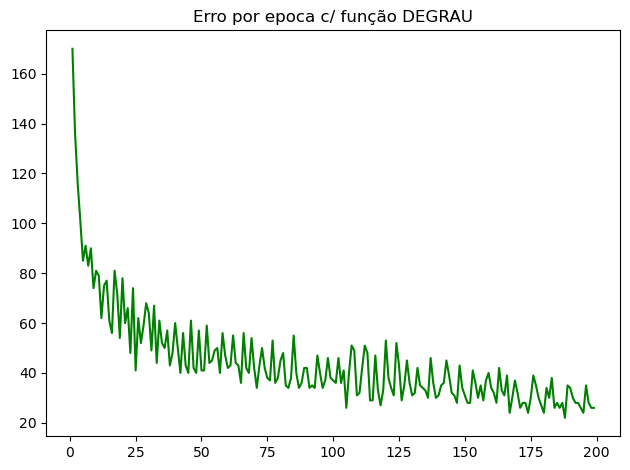

In [113]:
coord_x = list(range(1, maximo_iteracoes))
coord_yDEGRAU = treino_degrau[0]

plt.title("Erro por epoca c/ função DEGRAU")
plt.plot(coord_x, coord_yDEGRAU, color="green")
plt.show()

In [114]:
tipo_funcao = 'degrau'
acuracia_degrau = teste_rede(peso_DEGRAU, bias_DEGRAU, df_Test, tipo_funcao)
print("Acuracia para a Rede Neural utilizando a função DEGRAU foi de: " + str(acuracia_degrau * 100) + "%")

Acuracia para a Rede Neural utilizando a função DEGRAU foi de: 65.07936507936508%


# Rede Neural utilizando SIGMOIDE:

In [115]:
# Gerando os primeiros valores aleatoios para 'w' e 'b' para a função SIGMOIDE
w = np.random.uniform(-1,1, size=(3,7))
b = np.random.uniform(-1,1, size=(3))

print(w)
print(b)

[[-0.722277    0.98881222  0.42839191  0.87670253 -0.70884555  0.45070749
   0.18385671]
 [ 0.88088562 -0.34869227  0.02482719  0.41491369 -0.59260519 -0.44940668
   0.69860936]
 [ 0.61045429  0.74620247 -0.3567582   0.19685968  0.67940981  0.66509233
  -0.66520754]]
[ 0.931407   -0.5190476   0.50928341]


In [116]:
taxa_aprendizado = 0.5; maximo_iteracoes = 200;
tipo_funcao = 'sigmoide'
treino_sigmoide = treina_rede(w, b, df_Learn, tipo_funcao, maximo_iteracoes, taxa_aprendizado)
print("Erro por epoca: " + str(treino_sigmoide[0]))

/tmp/ipykernel_3848/147260631.py:5: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-saida[i]))


Erro por epoca: [166.02202163365843, 134.3470271378605, 107.29313253739387, 109.68751627622339, 92.52655700696666, 94.79921731865652, 80.4899972045719, 75.61141694954115, 79.03972319878628, 76.1040709086117, 76.11332267349259, 74.92153261983998, 68.99434502070783, 63.67527163586703, 83.08845801648837, 64.36211129222143, 70.6194317889162, 51.841885398309394, 78.22341631365819, 62.013542974273975, 54.30372437027582, 68.59775524238718, 54.55787072907429, 60.92878705986771, 46.11916261540681, 68.0235956318904, 67.78082351625767, 54.19507795978779, 54.227141675910616, 57.84960381246581, 50.967944276480644, 67.60933184395635, 47.49533742018969, 43.337911420163216, 56.78059033741057, 47.38539940788901, 45.26002738153146, 59.777435900236654, 49.568616966762185, 53.98990435803222, 44.877819887412784, 49.971855169533356, 61.75239773796855, 47.909856443818136, 49.01288975298648, 41.72928713982391, 44.30377746806625, 38.031918810793044, 59.07978645365306, 53.638027933481716, 43.83830154898719, 57.

In [117]:
peso_SIGMOIDE = treino_sigmoide[1]
bias_SIGMOIDE = treino_sigmoide[2]

print("Pesos: " + str(peso_SIGMOIDE))
print("\n Bias: " + str(bias_SIGMOIDE))

Pesos: [[ -50.90879254  153.18766503   56.74977101   44.29756853  169.49161704
   -51.58358746 -396.40109782]
 [ 209.28650091 -177.09192579  -34.93461016  -84.23037066  -53.24321459
    41.49413934  -13.74841899]
 [-188.93350422   89.11814749   10.49232862   66.22839213  -21.39442795
    39.31455437  152.10276056]]

 Bias: [ 33.63492744 -38.28040278  20.35384714]


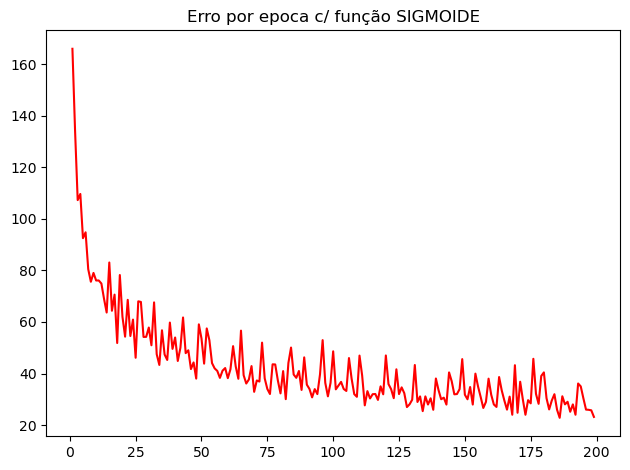

In [118]:
coord_x = list(range(1, maximo_iteracoes))
coord_ySIGMOIDE = treino_sigmoide[0]

plt.title("Erro por epoca c/ função SIGMOIDE")
plt.plot(coord_x, coord_ySIGMOIDE, color="red")
plt.show()

In [122]:
tipo_funcao = 'sigmoide'
acuracia_sigmoide = teste_rede(peso_SIGMOIDE, bias_SIGMOIDE, df_Test, tipo_funcao)
print("Acuracia para a Rede Neural utilizando a função DEGRAU foi de: " + str(acuracia_sigmoide * 100) + "%")

Acuracia para a Rede Neural utilizando a função DEGRAU foi de: 84.12698412698413%


# Resultados

Podemos perceber que a acuracia usando o método de SIGMOIDE foi consideravelmente superior ao treinamento usando a função limiar como a função DEGRAU, os gráficos de Erro acumulado por época junto da acuracia encontrada pelas duas funções pode ser re-visto abaixo:

Lembrando que para o treinamento foi utilizado 200 iterações/epocas com uma taxa de aprendizado de 0.5

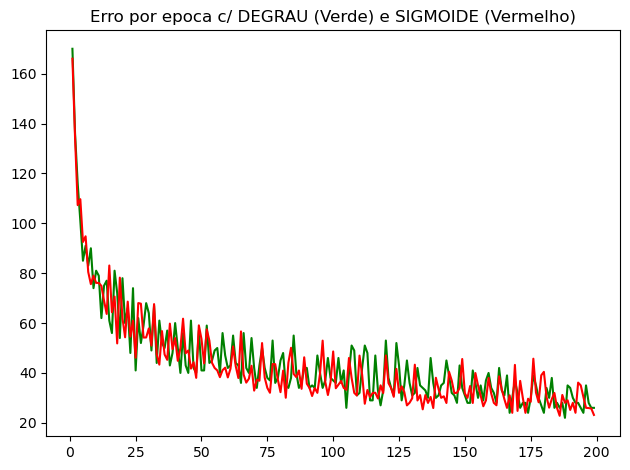

In [120]:
coord_x = list(range(1, maximo_iteracoes))
plt.title("Erro por epoca c/ DEGRAU (Verde) e SIGMOIDE (Vermelho)")
plt.plot(coord_x, coord_yDEGRAU,color="green")
plt.plot(coord_x, coord_ySIGMOIDE,color="red")
plt.show()

In [121]:
print("Acuracia para a Rede Neural utilizando a função DEGRAU foi de: " + str(acuracia_degrau * 100) + "%")
print("Acuracia para a Rede Neural utilizando a função SIGMOIDE foi de: " + str(acuracia_sigmoide * 100) + "%")

Acuracia para a Rede Neural utilizando a função DEGRAU foi de: 65.07936507936508%
Acuracia para a Rede Neural utilizando a função SIGMOIDE foi de: 84.12698412698413%
